fonte: https://machinelearningmastery.com/understanding-simple-recurrent-neural-networks-in-keras/

In [20]:
!pip install pydot

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


# SimpleRNN

In [18]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt
from tensorflow import keras

In [26]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

demo_model = create_RNN(2, 1, (3,1), activation=['linear', 'linear'])

In [30]:
demo_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (None, 2)                 8         
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


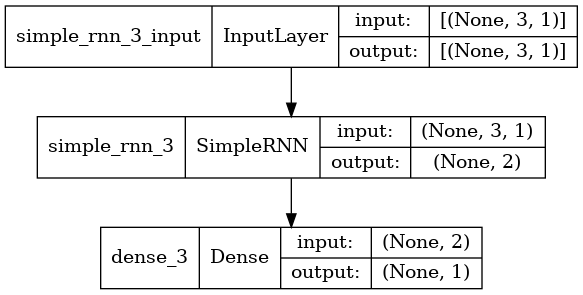

In [27]:
keras.utils.plot_model(demo_model, show_shapes=True)

In [28]:
wx = demo_model.get_weights()[0]
wh = demo_model.get_weights()[1]
bh = demo_model.get_weights()[2]
wy = demo_model.get_weights()[3]
by = demo_model.get_weights()[4]

print('wx = ', wx, ' wh = ', wh, ' bh = ', bh, ' wy =', wy, 'by = ', by)

wx =  [[-0.573419    0.71283495]]  wh =  [[-0.94058025 -0.33957157]
 [-0.33957157  0.94058025]]  bh =  [0. 0.]  wy = [[-0.7420519]
 [ 1.009066 ]] by =  [0.]


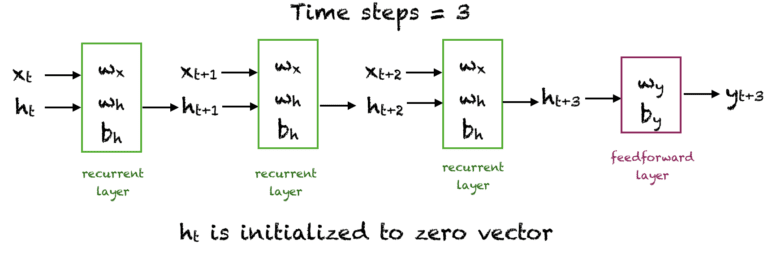

In [29]:
x = np.array([1, 2, 3])
# Reshape the input to the required sample_size x time_steps x features 
x_input = np.reshape(x,(1, 3, 1))
y_pred_model = demo_model.predict(x_input)


m = 2
h0 = np.zeros(m)
h1 = np.dot(x[0], wx) + h0 + bh
h2 = np.dot(x[1], wx) + np.dot(h1,wh) + bh
h3 = np.dot(x[2], wx) + np.dot(h2,wh) + bh
o3 = np.dot(h3, wy) + by

print('h1 = ', h1,'h2 = ', h2,'h3 = ', h3)

print("Prediction from network ", y_pred_model)
print("Prediction from our computation ", o3)

h1 =  [[-0.57341897  0.71283495]] h2 =  [[-0.84954987  2.29086517]] h3 =  [[-1.69909977  4.58173037]]
Prediction from network  [[5.8840885]]
Prediction from our computation  [[5.88408848]]


## h1

In [11]:
print(x[0])
print(wx)
print(np.dot(x[0],wx))
print(h0)
print(bh)
print(h1)

1
[[-1.3118062   0.70632184]]
[[-1.3118062   0.70632184]]
[0. 0.]
[0. 0.]
[[-1.3118062   0.70632184]]


## h2

In [12]:
print(x[1])
print(wx)
print(np.dot(x[1],wx))
print(h1)
print(wh)
print(np.dot(h1,wh))
print(bh)
print(h2)

2
[[-1.3118062   0.70632184]]
[[-2.6236124   1.41264367]]
[[-1.3118062   0.70632184]]
[[-0.9139656 -0.4057917]
 [-0.4057917  0.9139656]]
[[0.91232618 1.17787392]]
[0. 0.]
[[-1.71128622  2.59051759]]


## Obtendo Dados de uma URL

In [13]:
# Parameter split_percent defines the ratio of training examples
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'
train_data, test_data, data = get_train_test(sunspots_url)

In [14]:
print(train_data)
print(type)

[0.22852638 0.24665089 0.2758077  ... 0.3506698  0.4546887  0.4862096 ]


# Reshape

In [15]:
# Prepare the input X and target Y
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))    
    return X, Y

time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

# Exemplo do Keras

In [16]:
inputs = np.random.random([32, 10, 8]).astype(np.float32)
simple_rnn = tf.keras.layers.SimpleRNN(4)

output = simple_rnn(inputs)  # The output has shape `[32, 4]`.

simple_rnn = tf.keras.layers.SimpleRNN(
    4, return_sequences=True, return_state=True)

# whole_sequence_output has shape `[32, 10, 4]`.
# final_state has shape `[32, 4]`.
whole_sequence_output, final_state = simple_rnn(inputs)

NameError: name 'tf' is not defined